# Shiva Singh 22103066 
# Sentiment Analysis of amazon alexa reviews on scale of 1 to 5
# 5 means loved it!, 1 means not liked much

In [209]:
# importing essential libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [210]:
# Raeding the dataframe
df= pd.read_csv("C:\\Users\\shiva\\Downloads\\amazon_alexa.tsv", delimiter='\t')

In [211]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [212]:
df.info()
# it have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [213]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# EDA

<Axes: xlabel='rating'>

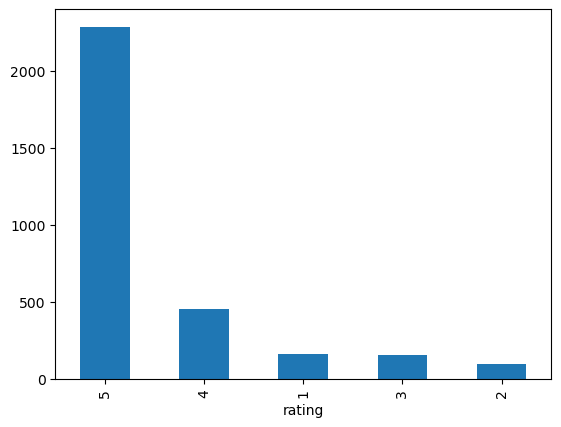

In [214]:
df['rating'].value_counts().plot.bar()
# seems like a unbalanced dataset

<Axes: xlabel='feedback', ylabel='count'>

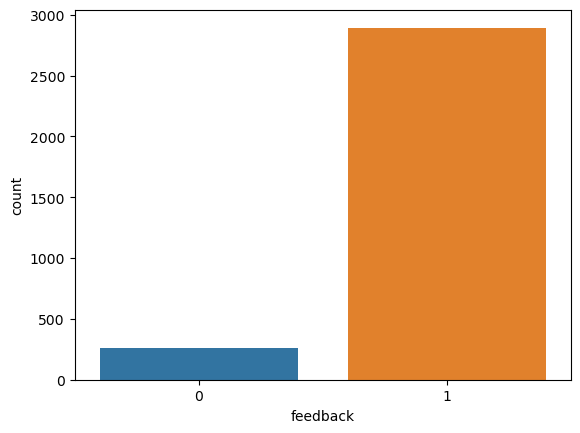

In [215]:
sns.countplot(x=df['feedback'])

<Axes: xlabel='rating', ylabel='count'>

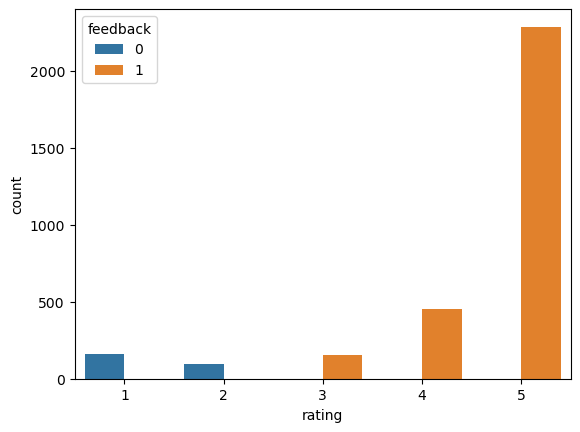

In [216]:
sns.countplot(x=df['rating'],hue=df['feedback'])

<Axes: xlabel='variation'>

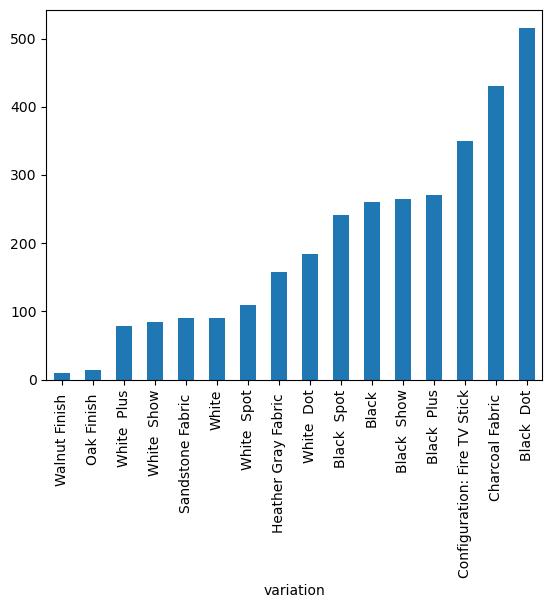

In [217]:
df_var=df['variation'].value_counts()
df_var.sort_values(inplace=True)
df_var.plot.bar()

# Modeling

In [218]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [219]:
X=df['verified_reviews']
y=df['rating']

In [220]:
X=cv.fit_transform(X)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [221]:
# this error show that there are some NaN values present which should be removed

In [222]:
df['verified_reviews'].fillna('', inplace=True) # Replacing NAN values with space 

In [223]:
X.str.lower() # lowering down the characters

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [224]:
import nltk
from nltk.stem import PorterStemmer
stemming=PorterStemmer()

In [225]:
from nltk.corpus import stopwords

# Getting the list of English stopwords
stop_words = set(stopwords.words('english'))
 
def remove_stopwords(text):
    words = text.split()
    # Removing stopwords from the each row and applying Stemming
    filtered_words = [stemming.stem(word) for word in words if word not in stop_words]
    # Joining to make the new filtered sentence
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Using apply method to remove_stopwords from each row in X
X = X.apply(remove_stopwords)


In [226]:
X

0                                              love echo!
1                                                love it!
2       sometim play game, answer question correctli a...
3       i lot fun thing. my 4 yr old learn dinosaurs, ...
4                                                   music
                              ...                        
3145                perfect kids, adult everyon between!!
3146    listen music, search locations, check time, lo...
3147    i love things, run entir home, tv, lights, the...
3148    onli complaint i sound qualiti great. i mostli...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

# Creating train and test data

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Creating a pipeline to classify the rating

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

In [230]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [231]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [232]:
pred=pipeline.predict(X_test)

In [233]:
from sklearn.metrics import confusion_matrix, classification_report

In [234]:
print(confusion_matrix(y_test,pred))
print('/n')
print(classification_report(y_test,pred))


[[ 19   0   0   3  35]
 [  1  10   0   1  30]
 [  1   0  17   0  36]
 [  1   0   0  47 102]
 [  1   0   0   9 727]]
/n
              precision    recall  f1-score   support

           1       0.83      0.33      0.47        57
           2       1.00      0.24      0.38        42
           3       1.00      0.31      0.48        54
           4       0.78      0.31      0.45       150
           5       0.78      0.99      0.87       737

    accuracy                           0.79      1040
   macro avg       0.88      0.44      0.53      1040
weighted avg       0.80      0.79      0.75      1040

